In [1]:
#importa SpaCy y carga el modelo en inglés
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
#importammos git
import git

#cargamos el modelo en inglés
nlp = spacy.load("en_core_web_sm")

#Clonar el corpus desde GitHub con el siguiente link https://github.com/COST-ELTeC/ELTeC-eng.git





[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


/usr/local/python/3.10.4/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
!git clone https://github.com/COST-ELTeC/ELTeC-eng.git

fatal: destination path 'ELTeC-eng' already exists and is not an empty directory.


/home/codespace/.local/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


[('I', 3169), ('it', 2587), ('you', 2557), ('he', 2041), ('she', 1684), ('him', 1175), ('that', 1059), ('which', 1053), ('me', 870), ('her', 865)]


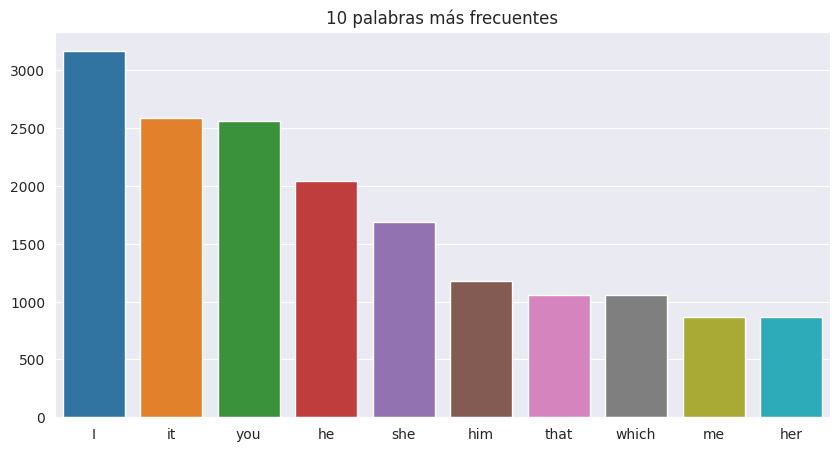

In [5]:
#abrir una única novela en la carpeta level1 de ELTeC-eng XML
with open('/workspaces/master-ua/Minería de textos/ELTeC-eng/level1/ENG18400_Trollope.xml', 'r') as file:
    text = file.read()
#procesar el XML y extraer los parrafos, se recomienda usar la librería BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(text, 'html.parser')
parrafos = soup.find_all('p')


#Analizar el texto con el pipeline básico de SpaCy y extraer un CSV con “palabra | lema | categoria_gramatical | tipo de dependencia sintáctica | palabra de quien depende 
import csv
with open('analisis.csv', 'w') as file:
    writer = csv.writer(file)
    for parrafo in parrafos:
        doc = nlp(parrafo.text)
        for token in doc:
            writer.writerow([token.text, token.lemma_, token.pos_, token.dep_, token.head.text])

#Extraer los 10 grupos nominales más frecuentes (opcional: mostrar en un gráfico). para ello recorre cada uno de los parrafos y extrae los grupos nominales nlp
#y los guarda en una lista. Una vez extraidos todos los grupos nominales, cuenta cuantas veces aparece cada uno de ellos y muestra los 10 más frecuentes
from collections import Counter
grupos_nominales = []
for parrafo in parrafos:
    doc = nlp(parrafo.text)
    for chunk in doc.noun_chunks:
        grupos_nominales.append(chunk.text)
frecuencia = Counter(grupos_nominales)
print(frecuencia.most_common(10))

#grafica las 10 palabras más frecuentes
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.title('10 palabras más frecuentes')
sns.barplot(x=[x[0] for x in frecuencia.most_common(10)], y=[x[1] for x in frecuencia.most_common(10)])
plt.show()






[('Michael', 689), ('Matthew', 446), ('Martha', 410), ('Mary', 379), ('Brotherton', 327), ('one', 209), ('first', 203), ('Tremlett', 193), ('two', 162), ('Edward', 154)]


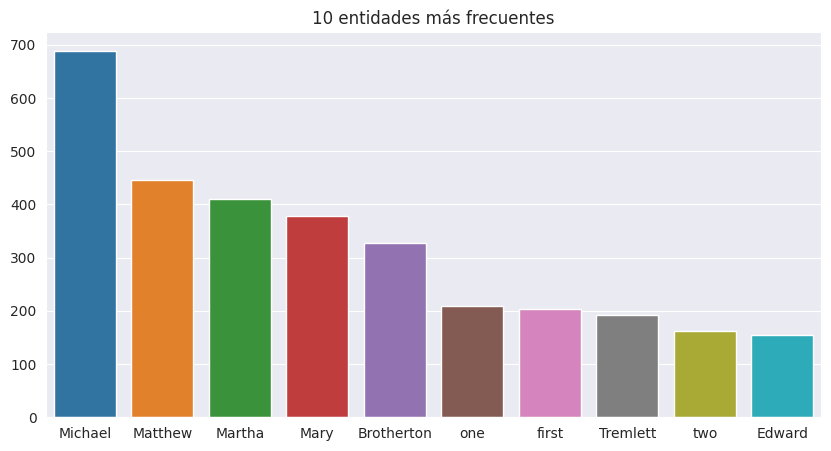

In [6]:

#Extraer las 10 entidades nombradas más frecuentes (opcional: mostrar en un gráfico).para ello recorre cada uno de los parrafos y extrae las entidades nlp
#y los guarda en una lista. Una vez extraidos todos las entidades, cuenta cuantas veces aparece cada uno de ellos y muestra los 10 más frecuentes
from collections import Counter
entidades = []
for parrafo in parrafos:
    doc = nlp(parrafo.text)
    for ent in doc.ents:
        entidades.append(ent.text)
frecuencia = Counter(entidades)
print(frecuencia.most_common(10))

#grafica las 10 palabras más frecuentes
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.title('10 entidades más frecuentes')
sns.barplot(x=[x[0] for x in frecuencia.most_common(10)], y=[x[1] for x in frecuencia.most_common(10)])
plt.show()


[('boy', 367), ('man', 260), ('mother', 246), ('time', 242), ('thing', 240), ('factory', 235), ('eyes', 234), ('way', 233), ('child', 228), ('lady', 225)]
[('little', 682), ('poor', 376), ('good', 357), ('young', 336), ('dear', 335), ('great', 250), ('more', 237), ('other', 235), ('own', 233), ('such', 208)]
[('said', 729), ('know', 438), ('replied', 432), ('think', 355), ('do', 350), ('have', 335), ('see', 273), ('say', 273), ('had', 267), ('made', 255)]
[('so', 793), ('very', 682), ('as', 356), ('now', 341), ('then', 330), ('too', 321), ('more', 303), ('again', 289), ('well', 284), ('never', 272)]


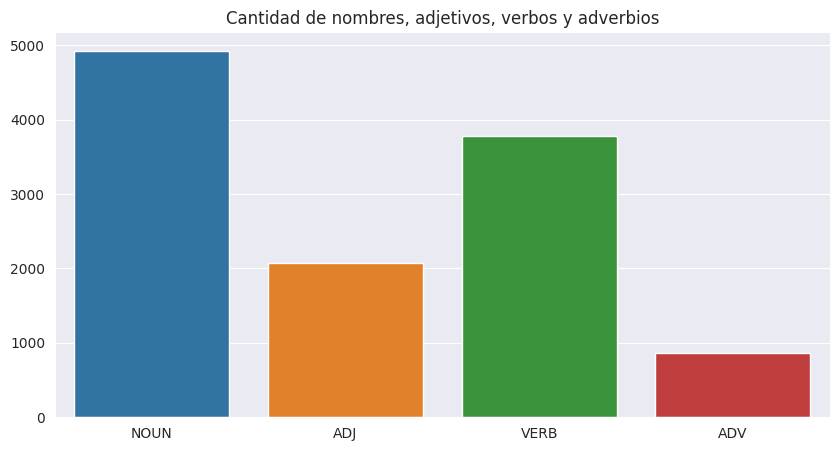

In [8]:
#Crear un gráfico donde se muestren la cantidad de nombres, adjetivos, verbos y adverbios.  (opcional: mostrar en un gráfico). para ello recorre cada uno de los parrafos y extrae nombres, adjetivos, verbos y adverbios nlp
#y los guarda en una lista. Una vez extraidos todos las entidades, cuenta cuantas veces aparece cada uno de ellos.
from collections import Counter
nombres = []
adjetivos = []
verbos = []
adverbios = []
for parrafo in parrafos:
    doc = nlp(parrafo.text)
    for token in doc:
        if token.pos_ == 'NOUN':
            nombres.append(token.text)
        elif token.pos_ == 'ADJ':
            adjetivos.append(token.text)
        elif token.pos_ == 'VERB':
            verbos.append(token.text)
        elif token.pos_ == 'ADV':
            adverbios.append(token.text)
frecuencia_nombres = Counter(nombres)
frecuencia_adjetivos = Counter(adjetivos)
frecuencia_verbos = Counter(verbos)
frecuencia_adverbios = Counter(adverbios)
print(frecuencia_nombres.most_common(10))
print(frecuencia_adjetivos.most_common(10))
print(frecuencia_verbos.most_common(10))
print(frecuencia_adverbios.most_common(10))

#grafica la cantidad de nombres, adjetivos, verbos y adverbios
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.title('Cantidad de nombres, adjetivos, verbos y adverbios')
sns.barplot(x=['NOUN', 'ADJ', 'VERB', 'ADV'], y=[len(frecuencia_nombres), len(frecuencia_adjetivos), len(frecuencia_verbos), len(frecuencia_adverbios)])
plt.show()




